# Use random forest to predict the price in the next 10 days
- Train according to the lstm model, based on the input of today's articles, predict the price in the next 10 days

In [2]:
from vnstock import *

stock_ls_analysis("EIB, TCB, VPB, TPB, SHB, VCB, MSB", lang='vi')


Mã CP,SHB,TCB,TPB,VCB,VPB,EIB,MSB
Vốn hóa (tỷ),39808,109034,36547,500224,165026,31336,26600
Giá,11000,31000,16600,89500,20800,18000,13300
Số phiên tăng/giảm liên tiếp,1,0,1,1,1,4,0
P/E,5.4,6.4,6.7,14.9,16.0,17.8,5.4
PEG,-0.6,-0.3,-0.7,0.5,-0.4,-0.5,0.7
P/B,0.8,0.9,1.1,3.1,1.5,1.4,0.9
Cổ tức,0.0,0.0,0.0,0.0,0.056,0.0,0.0
ROE,0.161,0.146,0.174,0.234,0.103,0.084,0.175
ROA,0.013,0.024,0.017,0.02,0.015,0.009,0.022
interestMargin,0.036,0.042,0.037,0.033,0.059,0.026,0.043


In [21]:
fr = financial_ratio(symbol="EIB", report_range='quarterly', is_all=True)
print(fr)

range                   Q3-2023 Q2-2023 Q1-2023 Q4-2022 Q3-2022 Q2-2022  \
ticker                      EIB     EIB     EIB     EIB     EIB     EIB   
quarter                      Q3      Q2      Q1      Q4      Q3      Q2   
year                       2023    2023    2023    2022    2022    2022   
priceToEarning             17.8    12.3     9.3    11.7    15.4    19.3   
priceToBook                 1.4     1.5     1.3     1.7     2.1     2.1   
roe                       0.084   0.126   0.151   0.154   0.145   0.112   
roa                       0.009   0.014   0.017   0.017   0.016   0.012   
earningPerShare            1013    1462    1720    1692    1570    1171   
bookValuePerShare         12434   12305   12149   11764   11559   10955   
interestMargin            0.026    0.03   0.033   0.033   0.031   0.027   
nonInterestOnToi          0.297   0.261   0.258   0.227   0.114   0.299   
badDebtPercentage         0.026   0.027   0.023   0.018   0.019   0.019   
provisionOnBadDebt       

In [32]:
import numpy as np
data_pb_pe = fr.iloc[3:5].to_dict()

# Remove entries where 'priceToEarning' is 'nan'
data_pb_pe = {key: value for key, value in data_pb_pe.items() if not np.isnan(value.get('priceToEarning'))}

# Print the cleaned data
print(data_pb_pe)

{'Q3-2023': {'priceToEarning': 17.8, 'priceToBook': 1.4}, 'Q2-2023': {'priceToEarning': 12.3, 'priceToBook': 1.5}, 'Q1-2023': {'priceToEarning': 9.3, 'priceToBook': 1.3}, 'Q4-2022': {'priceToEarning': 11.7, 'priceToBook': 1.7}, 'Q3-2022': {'priceToEarning': 15.4, 'priceToBook': 2.1}, 'Q2-2022': {'priceToEarning': 19.3, 'priceToBook': 2.1}, 'Q1-2022': {'priceToEarning': 31.5, 'priceToBook': 2.5}, 'Q4-2021': {'priceToEarning': 42.9, 'priceToBook': 2.3}, 'Q3-2021': {'priceToEarning': 42.2, 'priceToBook': 2.3}, 'Q2-2021': {'priceToEarning': 49.1, 'priceToBook': 3.1}, 'Q1-2021': {'priceToEarning': 39.9, 'priceToBook': 2.1}, 'Q4-2020': {'priceToEarning': 22.1, 'priceToBook': 1.4}, 'Q3-2020': {'priceToEarning': 24.5, 'priceToBook': 1.3}, 'Q2-2020': {'priceToEarning': 31.4, 'priceToBook': 1.4}, 'Q1-2020': {'priceToEarning': 18.9, 'priceToBook': 1.1}, 'Q4-2019': {'priceToEarning': 25.3, 'priceToBook': 1.4}, 'Q3-2019': {'priceToEarning': 31.9, 'priceToBook': 1.3}, 'Q2-2019': {'priceToEarning': 4

In [33]:
# Reverse the dictionary
reversed_dict = {key: data_pb_pe[key] for key in reversed(data_pb_pe)}

# Print the reversed dictionary
print(reversed_dict)

{'Q1-2015': {'priceToEarning': 128.5, 'priceToBook': 1.1}, 'Q2-2015': {'priceToEarning': -948.9, 'priceToBook': 1.1}, 'Q3-2015': {'priceToEarning': -96.8, 'priceToBook': 1.0}, 'Q4-2015': {'priceToEarning': 220.4, 'priceToBook': 1.0}, 'Q1-2016': {'priceToEarning': -39.3, 'priceToBook': 1.0}, 'Q2-2016': {'priceToEarning': -44.3, 'priceToBook': 1.1}, 'Q3-2016': {'priceToEarning': -41.7, 'priceToBook': 0.9}, 'Q4-2016': {'priceToEarning': 35.8, 'priceToBook': 0.8}, 'Q1-2017': {'priceToEarning': 34.0, 'priceToBook': 1.1}, 'Q2-2017': {'priceToEarning': 27.6, 'priceToBook': 1.2}, 'Q3-2017': {'priceToEarning': 29.3, 'priceToBook': 1.1}, 'Q4-2017': {'priceToEarning': 18.9, 'priceToBook': 1.1}, 'Q1-2018': {'priceToEarning': 15.2, 'priceToBook': 1.2}, 'Q2-2018': {'priceToEarning': 14.5, 'priceToBook': 1.2}, 'Q3-2018': {'priceToEarning': 12.8, 'priceToBook': 1.1}, 'Q4-2018': {'priceToEarning': 26.1, 'priceToBook': 1.2}, 'Q1-2019': {'priceToEarning': 43.6, 'priceToBook': 1.4}, 'Q2-2019': {'priceToEa

In [36]:
import plotly.graph_objects as go

# Your data
data = reversed_dict

# Separate the data into x values (quarters), y1 values (priceToEarning), and y2 values (priceToBook)
quarters = list(data.keys())
priceToEarning = [values['priceToEarning'] for values in data.values()]

# Create a trace for priceToEarning
trace1 = go.Scatter(x=quarters, y=priceToEarning, mode='lines', name='Price to Earning')

# Define the layout
layout = go.Layout(title='Financial Ratios Over Quarters', xaxis=dict(title='Quarters'), yaxis=dict(title='Value'))

# Create a Figure and add the traces
fig = go.Figure(data=[trace1], layout=layout)

# Show the plot
fig.show()

In [ ]:
financial_flow(symbol="TCB", report_type='incomestatement', report_range='quarterly')

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2023-Q3,TCB,7272,-0.039,0.155,None,None,-3631,10418,0.008,0.117,...,4669,4613,-0.129,0.035,761,2256,129,-945,6788,None
2023-Q2,TCB,6295,-0.192,-0.036,None,None,-2869,9325,-0.147,0.003,...,4503,4455,-0.232,-0.009,72,2019,939,-807,6456,None
2023-Q1,TCB,6527,-0.195,-0.043,None,None,-3142,9300,-0.071,-0.014,...,4537,4497,-0.183,0.269,-228,1944,1057,-535,6158,None
2022-Q4,TCB,6819,-0.059,-0.099,None,None,-3990,9427,-0.072,-0.088,...,3572,3544,-0.228,-0.331,-422,2535,495,-691,5437,None
2022-Q3,TCB,7565,0.122,-0.029,None,None,-3014,10338,0.178,-0.055,...,5368,5298,0.221,-0.087,209,2123,441,-609,7324,None
2022-Q2,TCB,7794,0.183,-0.039,None,None,-3196,10934,0.188,0.093,...,5882,5804,0.232,0.054,411,1987,743,-417,7739,None
2022-Q1,TCB,8111,0.325,0.120,None,None,-3003,10006,0.120,-0.015,...,5615,5505,0.252,0.199,-280,1687,488,-218,7004,None
2021-Q4,TCB,7245,0.328,0.074,None,None,-3392,10159,0.309,0.157,...,4684,4592,0.162,0.059,279,2103,532,-627,6767,None
2021-Q3,TCB,6742,0.310,0.023,None,None,-2628,8779,0.171,-0.046,...,4432,4338,0.400,-0.079,384,1497,156,-589,6151,None


## Use RNN for predict stock price next day.

In [ ]:
dates_train = get_last_days(365)

df_his = stock_historical_data('TPB', dates_train[0], dates_train[len(dates_train) - 1], '1D', 'stock')
print(df_his.head())

         time   open   high    low  close   volume ticker
0  2022-11-07  13890  13890  12950  13010  2521800    TPB
1  2022-11-08  12750  13400  12620  13270  4238700    TPB
2  2022-11-09  13400  13590  13010  13080  2799700    TPB
3  2022-11-10  12980  13010  12300  12880  2993600    TPB
4  2022-11-11  13270  13270  12430  12880  3738000    TPB


In [ ]:
print(df_his[['open']])

      open
0    13890
1    12750
2    13400
3    12980
4    13270
..     ...
245  16200
246  16100
247  15950
248  16050
249  16600

[250 rows x 1 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Select relevant features (e.g., historical prices and volumes)
# You may need to preprocess and engineer additional features
X = df_his[['open', 'high', 'low', 'volume']]  # Example features
y = df_his['close']  # The target variable (the stock's closing price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [ ]:
print(y_test.index, y_test.values)
print(df_his['time'][y_test.index])

Int64Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
            213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
            226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
            239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249],
           dtype='int64') [18800 18850 19000 19000 19550 19600 19650 19750 19650 19400 18950 19200
 19250 19000 19200 18950 19050 19500 19050 18550 18000 17700 17800 18050
 17850 17500 16700 16600 16550 16800 16850 16750 16750 17200 17250 16800
 16500 16250 16149 16500 16450 16800 16750 16000 16200 16000 15800 15800
 16400 16050]
200    2023-08-24
201    2023-08-25
202    2023-08-28
203    2023-08-29
204    2023-08-30
205    2023-08-31
206    2023-09-05
207    2023-09-06
208    2023-09-07
209    2023-09-08
210    2023-09-11
211    2023-09-12
212    2023-09-13
213    2023-09-14
214    2023-09-15
215    2023-09-18
216    2023-09-19
217    2023-09-20
218    2023-09-21
219    2023-09-22
220    20

Mean Squared Error: 78100.70145799997
R-squared (R2) Score: 0.9544067545557388


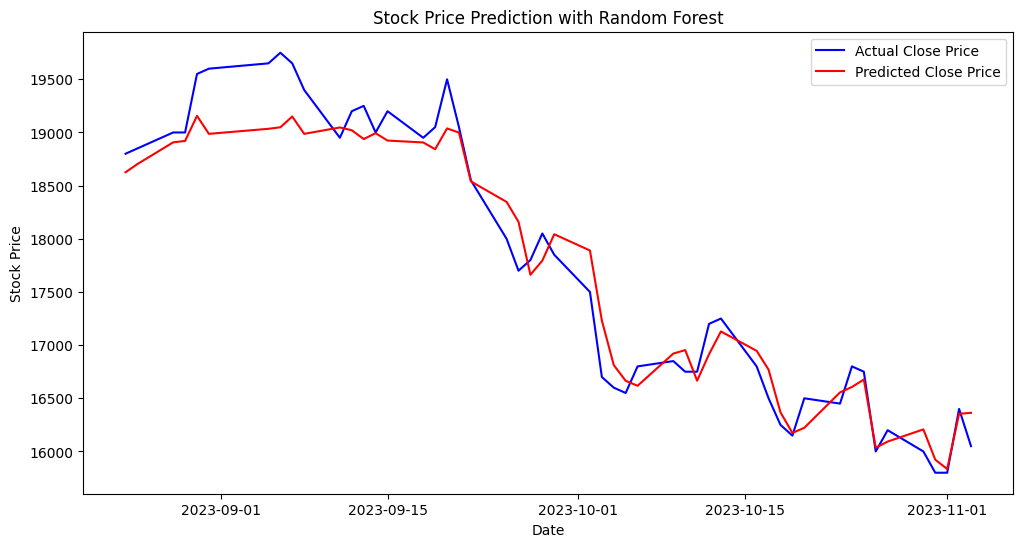

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df_his['time'][y_test.index], y_test.values, label='Actual Close Price', color='blue')
plt.plot(df_his['time'][y_test.index], y_pred, label='Predicted Close Price', color='red')
plt.title('Stock Price Prediction with Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
X = df_his[['open', 'high', 'low', 'volume']]  # Example features
y = df_his['close']  # The target variable (the stock's closing price)

# get last 10 days for predict.

X_check = X[len(X) - 10:]
y_check = y[len(y) - 10:]

# Make predictions on the test set
results = rf_model.predict(X_check)
print(results)

[16555.47 16606.4  16676.6  16035.04 16092.89 16207.42 15922.32 15835.25
 16354.14 16363.22]
